# Star Wars Surveys Analysis

## === Exordium ===
#### - In the following analysis we will be working with a Dataset about some questions compiled by the team at FiveThirtyEight, and address to the American Star Wars fan base.
#### - The purpose of the team with this surveys was to answer some questions such as: was the Episode V - The Empire Strikes Back, the favourite movie from the fans? If not which was? What were their favourite characters? Does Education levels from the side of the fans, present themselves as a differentiator in the rating of the 6 Star Wars movies from the saga?  Do we see differences in the fan base tastes when we segment the data in terms of Gender.  And what was the most seen movie of all?
#### - Because the Dataset had some dirty datapoints and some of the data was inserted in a columns dependency level we will need, prior to do the analysis, to do some cleaning. So first we will put our hands in the dough by cleaning what needs to be cleaned from the Dataset, and then we will do our analysis by resorting to some plots in order to better grasp the full potential of the data and to try to unlock some of its questions.

## Cleaning the Dataset - Episode 1

In [1]:
import pandas as pd
import numpy as np

# Reading into a Dataframe the Star Wars Dataset:
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
# Extracting and checking the Dataset columns:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

##### - Next we will remove all the NaN rows in the RespondentID col of our Dataset, using the notna() method:

In [3]:
star_wars = star_wars[star_wars['RespondentID'].notna()].copy()
# Validating the operation:
star_wars['RespondentID'].isnull().value_counts()

False    1186
Name: RespondentID, dtype: int64

##### - Converting the Yes's and No's in the 'Have you seen any of the 6 films in the Star Wars franchise?' col, to True's and False's. Transforming that way the entire col from a string type to a Boolean type:

In [4]:
star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'
        ] = star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'
        ].map({'Yes': True, 'No': False}).copy()

# Checking the results:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(
dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

##### - Now its time to convert the Yes's and No's in the 'Do you consider yourself to be a fan of the Star Wars film franchise?' col, to True's and False's. Transforming that way the entire col from a string type to a Boolean type:

In [5]:
star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
        ] = star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
        ].map({'Yes': True, 'No': False})
# Veifying the changes:
star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

##### - First we will rename all the cols that correspond to the movies seen by the Star Wars fans from Unnamed to seen, adding to it a numeric value that corresponds to each of the 6 Episodes from the saga. E.g., seen_Ep.1 == seen Episode I, seen_Ep.4 == seen Episode IV, seen_Ep.6 == seen Episode VI, etc.
##### - And after we will be changing the content of the cols. Passing from a str to a boolean type. First we will creat a list of all the names of the movies that populate our seen cols. Than, resorting to a for loop, we will change the format  of that very same columns. Attributing the ones with the name of the movie a True boolean and assuming that the ones that have null values correspond to False answers related to whether or not the fans have seen that particular movie:

In [6]:
star_wars = star_wars.rename(columns={
                'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_Ep.1',
                'Unnamed: 4': 'seen_Ep.2',
                'Unnamed: 5': 'seen_Ep.3',
                'Unnamed: 6': 'seen_Ep.4',
                'Unnamed: 7': 'seen_Ep.5',
                'Unnamed: 8': 'seen_Ep.6'
                                    }).copy()

movies = [
    'Star Wars: Episode I  The Phantom Menace', 
    'Star Wars: Episode II  Attack of the Clones',
    'Star Wars: Episode III  Revenge of the Sith',
    'Star Wars: Episode IV  A New Hope',
    'Star Wars: Episode V The Empire Strikes Back',
    'Star Wars: Episode VI Return of the Jedi'    
]
for n in np.arange(6):
    col = 'seen_Ep.{}'.format(n+1)
    star_wars[col] = star_wars[col].map({
    movies[n]: True, np.NaN: False})
    
# Checking and validating the previous changes in the Dataset:
for n in np.arange(6):
    col = 'seen_Ep.{}'.format(n+1)
    print(star_wars[col].value_counts().sum() == star_wars.shape[0])
    print(star_wars[col].value_counts())


True
True     673
False    513
Name: seen_Ep.1, dtype: int64
True
False    615
True     571
Name: seen_Ep.2, dtype: int64
True
False    636
True     550
Name: seen_Ep.3, dtype: int64
True
True     607
False    579
Name: seen_Ep.4, dtype: int64
True
True     758
False    428
Name: seen_Ep.5, dtype: int64
True
True     738
False    448
Name: seen_Ep.6, dtype: int64


##### - Converting the Star Wars movies rating on preference cols from str-float:

In [7]:
star_wars[star_wars.columns[3:15]] = star_wars[
                            star_wars.columns[3:15]].astype(float).copy()
# Checking the outcome of the operation:
print(star_wars[star_wars.columns[9:15]].dtypes)

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object


##### - Renaming those very same cols to a more descriptive name, resorting to the rename() method from pandas:

In [8]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_Ep.1',
    'Unnamed: 10': 'ranking_Ep.2',
    'Unnamed: 11': 'ranking_Ep.3',
    'Unnamed: 12': 'ranking_Ep.4',
    'Unnamed: 13': 'ranking_Ep.5',
    'Unnamed: 14': 'ranking_Ep.6'}).copy()

# Verifying the changes:
print(star_wars.columns[9:15])

Index(['ranking_Ep.1', 'ranking_Ep.2', 'ranking_Ep.3', 'ranking_Ep.4',
       'ranking_Ep.5', 'ranking_Ep.6'],
      dtype='object')


## Analyzing the Dataset Episode 1

##### - We will start by calculating the mean of all the 5 ranking cols. The values range from 1-6. Being 1 the most favorite and 6 the least favorite movie. So the ones that have a higher ranking value are the least favorite movies from the Star Wars saga, and vice-versa. And then we will plot the results:

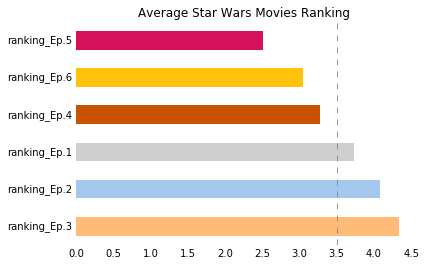

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

ranking_means = star_wars[
    star_wars.columns[9:15]].mean().sort_values(
ascending=False)

ranking_means.head()

# Plotting those means in a bar graph:
rank_graph = ranking_means.plot.barh(
    edgecolor='none',
color= [(255/255,188/255,121/255),
       (162/255,200/255, 236/255),
       (207/255,207/255,207/255),
       (200/255,82/255,0/255),
       (255/255,194/255,10/255),
       (212/255,17/255,89/255)])

# ENHANCING PLOT AESTHETICS: 

# Removing all the 4 spines with a for loop from our graph figure:
for key, spine in rank_graph.spines.items():
    spine.set_visible(False)
# Removing the ticks:    
rank_graph.tick_params(
    bottom='off', top='off', left='off', right='off')
# Setting a graph title:
rank_graph.set_title('Average Star Wars Movies Ranking')
# Setting an average graph line:
rank_graph.axvline(ranking_means.mean(), 
                   alpha=.8, linestyle='--', color='grey')
# Displaying the graph:
plt.show()

In [10]:
# Analysing the Age column from our Dataset:
star_wars['Age'].value_counts().sort_values()

18-29    218
30-44    268
> 60     269
45-60    291
Name: Age, dtype: int64

### Findings:

#### - Interestingly enough the 3 movies from the saga that enter the top 3 rank for the Star Wars fans are the very first 3 ones to be realeased: Star Wars Episode V - The Empire Srikes Back; Star Wars Episode VI - Return of the Jedi; Star Wars Episode IV, in order of choice.
#### - Another funny fact is that these very same 3 Episodes rank, in the Internet Movie Database website (IMDb), much higher than the other 3 ones, the 'new' movies from the saga: 8,7;  8,3 and 8,6 out of 10. Against 6,5; 6,5 and 7,5, for the Episodes I; II and III, respectively. 
#### - We can conclude that the choices from the fans on this survey are vey much aligned with the ranking of the Star Wars saga in biggest movies database over the Internet.
#### - Last but not least, when we dig a little bit deeper, we find that the age range from the biggest portion of the respondents of the survey is from around 30's onwards. This might explain the lean to the oldest movies from the Star Wars saga. Being these movies the ones from their teen age or young adult age, the ones that most influence and impact caused on them and their future lifes. 

##### - Next we will be indexing, calculating and sorting the data that corresponds to the six different movies seen by the fans, before plotting that very same data:

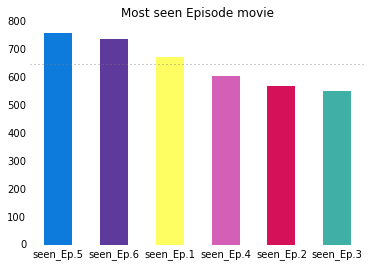

In [11]:
star_wars_seen_total = star_wars[star_wars.columns[3:9]].sum().copy().sort_values(
ascending=False)

# Plotting a bar graph of the total of movies seen per Episode of the Star
# Wars saga:
star_wars_seen_total_graph = star_wars_seen_total.plot.bar(
    edgecolor='none',
    color=[(12/255,123/255,220/255),
           (93/255,58/255,155/255),
           (254/255,254/255,98/255),
           (211/255,95/255,183/255),
           (212/255,17/255,89/255),
           (64/255,176/255,166/255)])
# Setting an average graph line:
star_wars_seen_total_graph.axhline(
    star_wars_seen_total.mean(),
color='grey', alpha=.8, linestyle=':')


# ENHANCING PLOT AESTHETICS: 

# Removing the ticks:
star_wars_seen_total_graph.tick_params(
bottom='off', top='off', left='off', right='off')
# Removing all the 4 spines with a for loop from our graph figure:
for key, spine in star_wars_seen_total_graph.spines.items():
    spine.set_visible(False)
    
# Setting a graph title:    
star_wars_seen_total_graph.set_title('Most seen Episode movie')
# Rotating the xtick labels:
plt.xticks(rotation='horizontal')
# Displaying the graph:  
plt.show()


### Findings:

#### - The result is in line with the previous conclusions. Two out of the three most voted movies from the Star Wars fans, are also the most seen ones: Episode V and Episode VI with more than 700 respondents having seen them. In between these 2 and the other most favorite movie from the saga, the Episode IV, stands Episode I with views that puts it above the average, roughly around 680. 
#### - The explanations for this meddling might be two: marketing and time. On one hand, beeing the movie Star Wars Episode IV the very first one to be realeased the expectations from 20th Century Fox weren't that high, so they didn't back the movie enough prior to their release. Not betting that much in marketing and even in theatrical run, being it initialy only released to a limited number. The success of the movie was far more due to it's screenplay/innovative special effects/actors/producer quality - its core content, than to the support of its Studio. The other explanations that placed the Episode I -  The Phantom Menace as the third most seen movie from all the saga were time, and marketing. Marketing that, for example the first movie didn't have, this had in double or more. Now being highly backed both from Lucas Arts and 20th Century Fox. 20th Century Fox knew now the kind of cash cow this was. And the time it took them to release this movie from their last one, Star Wars Episode VI - Return of the Jedi, more than 15 years, led all the fans to such an impatious level, that only grew more and more as years were passing. Creating the perfect momentum for the launch of the movie, and therefore a massive influx to the theaters. 

### Analyzing the Dataset in a Gender perspective 

##### - Dividing our Dataset into two new ones. One for Female respondents and another one for Male ones:

In [12]:
female = star_wars[star_wars['Gender'] == 'Female'].copy()
male = star_wars[star_wars['Gender'] == 'Male'].copy()
# Displaying the first 5 rows of the female Dataset:
female.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_Ep.1,seen_Ep.2,seen_Ep.3,seen_Ep.4,seen_Ep.5,seen_Ep.6,ranking_Ep.1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
112,3.291440e+09,True,True,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,Somewhat favorably,Greedo,Yes,No,Yes,Female,> 60,"$50,000 - $99,999",Bachelor degree,South Atlantic
113,3.291439e+09,True,False,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Somewhat favorably,I don't understand this question,No,NaN,No,Female,> 60,"$25,000 - $49,999",Graduate degree,Pacific
115,3.291436e+09,True,False,1.0,0.0,0.0,0.0,1.0,1.0,3.0,...,Somewhat favorably,I don't understand this question,No,NaN,No,Female,30-44,"$50,000 - $99,999",Graduate degree,South Atlantic
117,3.291434e+09,True,False,1.0,1.0,1.0,0.0,1.0,1.0,3.0,...,Somewhat unfavorably,I don't understand this question,No,NaN,No,Female,30-44,"$25,000 - $49,999",Bachelor degree,West South Central
118,3.291432e+09,True,True,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,Very favorably,Han,No,NaN,Yes,Female,30-44,"$25,000 - $49,999",Graduate degree,South Atlantic


##### - Redoing the same two previous analyses, and plotting two graph bars for the most ranked Star Wars movies and the most seen ones from all the saga:

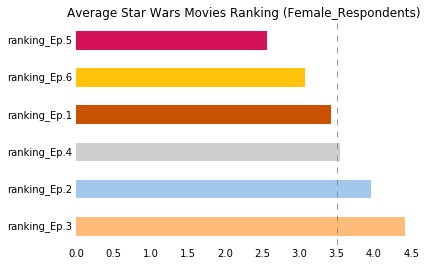

In [13]:
# Ladies first.

# Indexing, calculating and sorting the data that corresponds to the 
# Female gender:
ranking_means_female = female[
    female.columns[9:15]].mean().sort_values(
ascending=False)

ranking_means_female.head()

# Plotting those means in a bar graph:
rank_graph_female = ranking_means_female.plot.barh(
    edgecolor='none',
    color= [(255/255,188/255,121/255),
           (162/255,200/255, 236/255),
           (207/255,207/255,207/255),
           (200/255,82/255,0/255),
           (255/255,194/255,10/255),
           (212/255,17/255,89/255)])

# ENHANCING PLOT AESTHETICS:

# Removing all the 4 spines with a for loop from our graph figure:
for key, spine in rank_graph_female.spines.items():
    spine.set_visible(False)
# Removing the ticks:    
rank_graph_female.tick_params(
    bottom='off', top='off', left='off', right='off')
# Setting a graph title:
rank_graph_female.set_title('Average Star Wars Movies Ranking (Female_Respondents)')
# Setting an average graph line:
rank_graph_female.axvline(ranking_means_female.mean(), 
                   alpha=.8, linestyle='--', color='grey')
# Displaying the graph:
plt.show()

##### - Doing the same process as previous only this time for the male Gender:

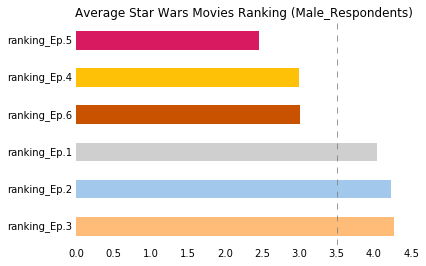

In [14]:
# Indexing, calculating and sorting the data that corresponds to the 
# Male Gender:
ranking_means_male = male[
    male.columns[9:15]].mean().sort_values(
ascending=False)

ranking_means_male.head()

# Plotting those means in a bar graph:
rank_graph_male = ranking_means_male.plot.barh(
    edgecolor='none',
    color= [(255/255,188/255,121/255),
            (162/255,200/255, 236/255),
            (207/255,207/255,207/255),
            (200/255,82/255,0/255),
            (255/255,193/255,7/255),
            (216/255,27/255,96/255)])

# ENHANCING PLOT AESTHETICS:

# Removing all the 4 spines with a for loop from our graph figure:
for key, spine in rank_graph_male.spines.items():
    spine.set_visible(False)
# Removing the ticks:    
rank_graph_male.tick_params(
    bottom='off', top='off', left='off', right='off')
# Setting a graph title:
rank_graph_male.set_title('Average Star Wars Movies Ranking (Male_Respondents)')
# Setting an average graph line:
rank_graph_male.axvline(ranking_means_male.mean(), 
                   alpha=.8, linestyle='--', color='grey')
# Displaying the graph:
plt.show()

##### - Now lets deal with the number of views per movie, for all the six Episodes of the Star Wars saga that the Female Gender as seen:

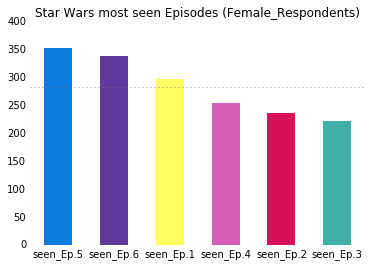

In [15]:
# As usual, ladies first.

# Indexing, calculating and sorting the data that corresponds to the 
# Female Gender:
female_seen_total = female[female.columns[3:9]].sum().copy().sort_values(
ascending=False)
# Plotting a bar graph of the Female_seen_total Dataset: 
female_seen_total_graph = female_seen_total.plot.bar(
    edgecolor='none',
    color=[(12/255,123/255,220/255),
           (93/255,58/255,155/255),
           (254/255,254/255,98/255),
           (211/255,95/255,183/255),
           (212/255,17/255,89/255),
           (64/255,176/255,166/255)])

# ENHANCING PLOT AESTHETICS: 

# Setting an average graph line:
female_seen_total_graph.axhline(
    female_seen_total.mean(),
color='grey', alpha=.8, linestyle=':')
# Turning off all the ticks:
female_seen_total_graph.tick_params(
bottom='off', top='off', left='off', right='off')
# Cleaning out all the spines from our graph figure:
for key, spine in female_seen_total_graph.spines.items():
    spine.set_visible(False)    
# Setting a graph title:    
female_seen_total_graph.set_title('Star Wars most seen Episodes (Female_Respondents)')
# Rotating the xtick labels:
plt.xticks(rotation='horizontal')
# Displaying the graph:    
plt.show()

##### - Doing the same process as previous only this time for the male Gender:

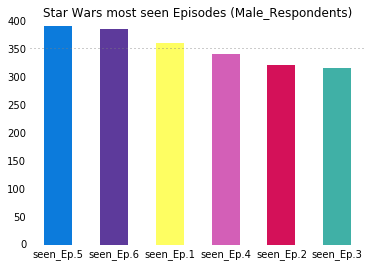

In [16]:
# Indexing, calculating and sorting the data that corresponds to the 
# Male Gender:
male_seen_total = male[male.columns[3:9]].sum().copy().sort_values(
ascending=False)
# Plotting a bar graph of the male_seen_total Dataset:
male_seen_total_graph = male_seen_total.plot.bar(
    edgecolor='none',
    color=[(12/255,123/255,220/255),
           (93/255,58/255,155/255),
           (254/255,254/255,98/255),
           (211/255,95/255,183/255),
           (212/255,17/255,89/255),
           (64/255,176/255,166/255)])

# ENHANCING PLOT AESTHETICS:

# Setting an average graph line:
male_seen_total_graph.axhline(
    male_seen_total.mean(),
color='grey', alpha=.8, linestyle=':')
# Turning off all the ticks:
male_seen_total_graph.tick_params(
bottom='off', top='off', left='off', right='off')
# Cleaning out all the spines from our graph figure:
for key, spine in male_seen_total_graph.spines.items():
    spine.set_visible(False)
# Setting a graph title:    
male_seen_total_graph.set_title('Star Wars most seen Episodes (Male_Respondents)')
# Rotating the xtick labels:
plt.xticks(rotation='horizontal')
# Displaying the graph:    
plt.show()

### Findings:

#### - Interesting discoveries. If on the Total number of Movies seen both genders present similar results over all the six movies from the saga, the same can't be said on the way the two genders ranked the movies.
#### - The ranking gap between the 'old' three movies and the 'new' ones is much more pronounced in the Male respondents rather than in the Female ones. The Female fans even ranked the the Star Wars Episode I -  The Phantom Menace at number 3, relegating to fourth the Episode IV. For the Male fans this Episode was their second choice for best Star Wars movie from all the six.
#### - Does this means that men are more into sci-fi movies per own initative rather than women that need a 'push' from all the marketing machine, or does it means that women were awakening late to the uniqueness of the Star Wars saga? 

### Analyzing the Dataset and the respondents ranking answers related to their degree of Education

In [17]:
# Figuring out how many Education levels there are in the Dataset:
star_wars['Education'].value_counts(dropna=False)


Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

##### - Creating our pivot table based on those 5 levels of Education:

In [18]:
education_pivot = star_wars.pivot_table(
    index='Education',
    values=['ranking_Ep.1', 
            'ranking_Ep.2', 
            'ranking_Ep.3', 
            'ranking_Ep.4', 
            'ranking_Ep.5',
            'ranking_Ep.6'],
    aggfunc='mean',
    dropna=True
    )

# Reseting the Dataframe (DF) index and turning Education as a label:
education_pivot = education_pivot.reset_index().copy()
# Displaying the first five rows of our newly created education_pivot DF:
education_pivot.head()

,Education,ranking_Ep.1,ranking_Ep.2,ranking_Ep.3,ranking_Ep.4,ranking_Ep.5,ranking_Ep.6
0,Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
1,Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
2,High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
3,Less than high school degree,5.000000,5.333333,3.666667,2.666667,1.000000,3.333333
4,Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228


##### - Plotting 6 pie charts, one for each movie, of the rankings segmented by the Star Wars fans Education levels. These levels are divided into 5 categories: Bachelor degree (Bachelor); Graduate degree (Graduate); High school degree (High school); Less than high school degree (Less than high school); Some College or Associate degree (Some College or Associate):

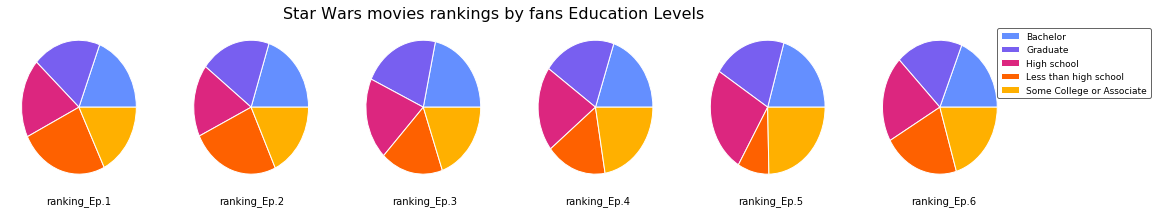

In [19]:
# Setting up a friendly color blindness palette:
colors=[(100/255,143/255,255/255),
         (120/255,95/255,240/255),
        (220/255,38/255,127/255),
         (254/255,97/255,0/255),
        (255/255,176/255,0/255)]

# Setting the labels:
labels=('Bachelor',
        'Graduate', 
        'High school',
        'Less than high school',
        'Some College or Associate')

fig = plt.figure(figsize=(18, 3))

# Removing the edgecolor black from all the pie charts:
plt.rcParams['patch.edgecolor'] = 'white'

# Plotting 6 pie graphs of the education_pivot Dataset:
for s in range (0,6):
    ax = fig.add_subplot(1,6,s+1)
    ax.pie(education_pivot[['ranking_Ep.{}'.format(s+1)]],
          labels=None, colors=colors)
    # ENHANCING PLOT AESTHETICS:
    xticks = ax.set_xticks([s/80])
    xlabels = ax.set_xticklabels(['ranking_Ep.{}'.format(s+1)])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    
# Setting up a legend box for our pie graph:    
ax.legend(
     
    labels=('Bachelor', 
            'Graduate', 
            'High school',
            'Less than high school',
            'Some College or Associate'),
    prop={'size':9}, bbox_to_anchor=(2, 1),
    fancybox=True, framealpha=.6)

# Setting a graph title:    
fig.suptitle('Star Wars movies rankings by fans Education Levels',
            fontsize=16)

# Displaying the graph:
plt.show()

### Findings:

#### - There isn't, at a first glance, a very strong evidence that respondents belonging to one certain level of Education tend to choose some certain Episodes over others, from all the six movies of the Star Wars saga in analysis, ranking some group of movies much higher in detriment of others. 
#### - The sample tends do be moreless homogeneous. If from one side we see fans with less than a High School degree giving a high ranking to The Star Wars Episode V. They than cut that score in the next movie of the saga, the Episode VI, and give a better ranking to the third movie, Star Wars Episode III - Revenge of the Sith. Moreless the same applies to the High School Degree fans. They tend to rank all the six movies moreless the same.
#### - A slight trend is observable though for the Bachelor and Graduate groups. These two groups seem to give a slightly better rank to the 'old' movies (Episodes IV-VI) from the saga, compared to 'new' ones ((Episodes I-III).

## Cleaning the Dataset Episode 2
#### The most and the least loved, and the more controversial characters from all the 6 Episodes

In [20]:
# Returning the necessary cols for this specific analysis:
print(star_wars.columns[15:29])

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')


##### - Renaming all our cols that rate, according to the fans preferences, the characters from the first six Episodes of the Star Wars saga. Each column is being renamed after the correspondent character:

In [21]:
star_wars = star_wars.rename(columns={
'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
'Unnamed: 16': 'Luke Skywalker',
'Unnamed: 17': 'Princess Leia Organa',
'Unnamed: 18': 'Anakin Skywalker',
'Unnamed: 19': 'Obi Wan Kenobi',
'Unnamed: 20': 'Emperor Palpatine',
'Unnamed: 21': 'Darth Vader',
'Unnamed: 22': 'Lando Calrissian',
'Unnamed: 23': 'Boba Fett',
'Unnamed: 24': 'C-3P0',
'Unnamed: 25': 'R2 D2',
'Unnamed: 26': 'Jar Jar Binks',
'Unnamed: 27': 'Padme Amidala',
'Unnamed: 28': 'Yoda'}).copy()
                            
# Validating the previous changes:
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

##### - Checking, resorting to the value_counts() method, how many rating types there are to rank our characters:

In [22]:
star_wars['Luke Skywalker'].value_counts(dropna=False).sort_values()

Very unfavorably                                 3
Unfamiliar (N/A)                                 6
Somewhat unfavorably                            13
Neither favorably nor unfavorably (neutral)     38
Somewhat favorably                             219
NaN                                            355
Very favorably                                 552
Name: Luke Skywalker, dtype: int64

In [23]:
star_wars['Darth Vader'].value_counts(dropna=False).sort_values()

Unfamiliar (N/A)                                10
Neither favorably nor unfavorably (neutral)     84
Somewhat unfavorably                           102
Very unfavorably                               149
Somewhat favorably                             171
Very favorably                                 310
NaN                                            360
Name: Darth Vader, dtype: int64

In [24]:
star_wars['Yoda'].value_counts(dropna=False).sort_values()

Very unfavorably                                 8
Somewhat unfavorably                             8
Unfamiliar (N/A)                                10
Neither favorably nor unfavorably (neutral)     51
Somewhat favorably                             144
NaN                                            360
Very favorably                                 605
Name: Yoda, dtype: int64

##### - In the few samples we previous analyzed we already check that the number of Null values is very material in all of them. Let's check in all of our characters cols with the isna() method:

In [25]:
star_wars[star_wars.columns[15:29]].isna().sum()

Han Solo                357
Luke Skywalker          355
Princess Leia Organa    355
Anakin Skywalker        363
Obi Wan Kenobi          361
Emperor Palpatine       372
Darth Vader             360
Lando Calrissian        366
Boba Fett               374
C-3P0                   359
R2 D2                   356
Jar Jar Binks           365
Padme Amidala           372
Yoda                    360
dtype: int64

### Findings:

#### - The number of Null values although being very significant, its very similar in terms of frequency, across all the characters. Ranging from 355-374. This might be to some shared missing values across all the Dataset or some shared errors in inputing the data. Either way, being the numbers very similiar across all the Dataset, opting for excluding all these Nulls for our analysis becomes much less violent per se. 

##### - Droping all the nulls from our characters rating using the dropna method, and assigning the values to a new variable:

In [26]:
star_wars_characters_rating = star_wars[star_wars.columns[
    15:29]].dropna(axis=0).copy()
# Verifying the previous method:
star_wars_characters_rating.isna().sum()

Han Solo                0
Luke Skywalker          0
Princess Leia Organa    0
Anakin Skywalker        0
Obi Wan Kenobi          0
Emperor Palpatine       0
Darth Vader             0
Lando Calrissian        0
Boba Fett               0
C-3P0                   0
R2 D2                   0
Jar Jar Binks           0
Padme Amidala           0
Yoda                    0
dtype: int64

##### - Now thats combine the several types of answers that the respondents gave into 4 major groups: Favorably; Unfavorably; Neutral; Unknown. we do this in order to facilitate and structure our analysis in biggers groups:

In [27]:
star_wars_characters_rating = star_wars_characters_rating.replace([
    'Somewhat unfavorably', 
    'Very unfavorably',
    'Somewhat favorably',
    'Very favorably',
    'Unfamiliar (N/A)', 
    'Neither favorably nor unfavorably (neutral)'], 
    ['Unfavorably',
     'Unfavorably',
     'Favorably',
     'Favorably',
     'Unknown',
     'Neutral']).copy()

# Shortening some cols names, thus improving their readability:
star_wars_characters_rating = star_wars_characters_rating.rename(columns={
    'Princess Leia Organa': 'Princess Leia',
    'Anakin Skywalker': 'Anakin'}).copy()
# Displaying the first five rows
star_wars_characters_rating.head()

,Han Solo,Luke Skywalker,Princess Leia,Anakin,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Unknown,Unknown,Favorably,Favorably,Favorably,Favorably,Favorably
3,Favorably,Favorably,Favorably,Favorably,Favorably,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Unfavorably,Favorably,Favorably,Favorably,Favorably,Favorably
5,Favorably,Favorably,Favorably,Unfavorably,Favorably,Unfavorably,Favorably,Neutral,Favorably,Favorably,Favorably,Unfavorably,Favorably,Favorably
6,Favorably,Favorably,Favorably,Favorably,Favorably,Neutral,Favorably,Neutral,Favorably,Favorably,Favorably,Favorably,Neutral,Favorably


## Analyzing the Dataset Episode 2
#### The most and the least loved, and the more controversial characters from all the 6 Episodes


##### - Creating all our 4 Bars, based on the 4 major ratings each respondent gave to the main Star Wars characters, stacking them up accordingly to  that very same rating group, and distributing them along each of the main characters:

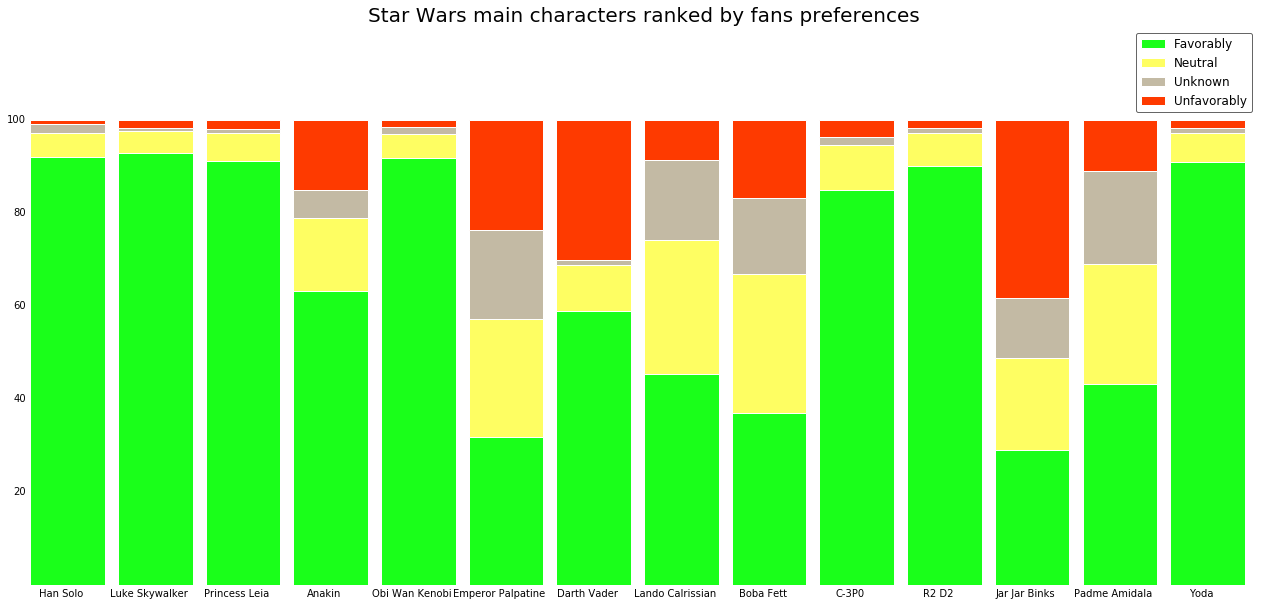

In [28]:
fig, ax = plt.subplots(figsize=(22,10))
characters = star_wars_characters_rating.columns.values
r = np.arange(len(characters))
bar_w = .85

# Calculating the percentages of the 4 major character rating groups:
Favorably = ((star_wars_characters_rating == 
    'Favorably').sum()/star_wars_characters_rating.shape[0]) * 100
Unfavorably = ((star_wars_characters_rating == 
        'Unfavorably').sum()/star_wars_characters_rating.shape[0]) * 100
Neutral = (star_wars_characters_rating ==
          'Neutral').sum()/star_wars_characters_rating.shape[0] * 100
Unknown = (star_wars_characters_rating == 
           'Unknown').sum()/star_wars_characters_rating.shape[0] * 100

# Plotting a stacked bar graph for each of the previous variables:
plt.bar(r, Favorably[r], color=(26/255,255/255,26/255), edgecolor='white', width = bar_w)
plt.bar(r, Neutral[r], bottom=Favorably[r], color=(254/255,254/255,98/255), edgecolor='white', width = bar_w)
plt.bar(r, Unknown[r], bottom=(Favorably[r]+ Neutral[r]), color=(195/255,186/255,164/255), edgecolor='white', width = bar_w)
plt.bar(r, Unfavorably[r], bottom=(Favorably[r]+ Neutral[r] + Unknown[r]), color=(254/255,58/255,0/255), edgecolor='white', width=bar_w)
plt.xticks(r+.35, characters)
plt.yticks(np.arange(20, 120, 20))

# ENHANCING PLOT AESTHETICS:

# Removing the ticks from the graph:
ax.tick_params(bottom='off',
              top='off',
              left='off',
              right='off')
# Removing the spines from our graph:
for key, spine in ax.spines.items():
    spine.set_visible(False)

# Setting up a legend box for our bar graph:    
plt.legend(
    loc='upper right', 
    labels=('Favorably', 'Neutral', 'Unknown', 'Unfavorably'), 
    ncol=1, fancybox=True, framealpha=.6)

# Setting a graph title:    
ax.set_title('Star Wars main characters ranked by fans preferences',
            fontsize=20)

# Displaying the graph:
plt.show()

### Findings:

#### - Not surprisingly the villain characters are seen as the least favourable of them all. In the opposite spectrum we have the so called heroes of the Star Wars saga. 
#### - Characters like Luke Skywalker; Obi Wan Kenobi; Han Solo; Yoda and R2 D2 all top the first 5 choices of the fans. And Luke will forever remain in all of the fans hearts as the one and only number 1. 
#### - The most unfavorable character of them all is, for surprise of many, or maybe not, Jar Jar Binks. I don' t think this is perceived as he beeing a villain, but rahter an empty shallow character. Very weak lines, forced appearances in the plot, like he would suddenly fall from the sky directly in the movie set. The only reasoning for me for him to have been in the movies was purely economics. Someone wanted to push their merchandising sales figures.
#### - No surprises on the other most unfavorable characters of the saga. Maybe I would expect, and this is my personal opinion, the most unfavorable one, apart from Jar Jar Binks, to be Emperor Palpatine, and not Darth Vader. I would even rate him as one of the Good ones. Not only because of his master played role and his amazing and iconic character, but also because of his contribute to the light side of the force, especially in the last episode of the saga. 
#### - Darth Vader, appart of being one of the least favourite characters, is also the most controversial one. If we take out of the equation the Unknown and the Neutral answers we end up with only the Favorably and the Unfavorably opinions of the fans. And taking these two antagonistic opinions no one beats Darth Vader in the bipolarization of the fans opinions. Hence my previous statement. You hate him or you love him, and fans opinions relatively to the character of Darth Vader are among the most divided ones. 
#### - On the side of the Unknowns I have to confess, WHO IS BOBA FETT? I have to say that I had to do an herculean effort to go to my very far far away corners of my brain only to, after googling for it, find out I was wrong :D. Anyway, I think this choice from the survey promotors - FiveThirtyEight was not the happiest one. Why not, for example, Chewbacca or Jabba the Hutt?
#### - The other mysterious personage, for the Star Wars fans surveyed, Lando Calrissian, I can only explain by a mix of old generation and lack of screenplay time?!


## === Bottom Line ===
#### After our analysis we can wrap and conclude the following:
    1. Star Wars fans are well aware of the importance of the Episode 5 - The Empire Strikes Back movie. Not only was this the most seen 
    movie as it was the one they ranked at number one from all the 6
    Episodes of the saga;
    
    2. There's a collage of the most ranked movies of the saga by the 
    fans, and their respective rating at IMDb. The opposite is also seen 
    on the other side of the force;
    
    3. Bad boys will go to the Dark side of the Force, and Good boys will top the preference choices of the fans;
    
    4. Better to be a bad boy than a bad actor or a bad role. And Jar 
    Jar Binks is a very good example of those two;
    
    5. Marketing expenditures with a pinch of growing anxiety creates 
    the ideal recipe to bring massive flows of fans to the movie 
    theaters. Well done 20th Century Fox, better late than never;
    
    6. The previous does not mean that you can apply the same recipe 
    over and over to boost movie theaters ticket sales. A horse will
    remain a horse no matter how well painted it is in black and white 
    strips. Better luck next time 20th Century Fox. Maybe channelling more money into the movies per se, and improving their quality, instead of masking them with tons of marketing woudn't be such a bad idea;
    
    7. The pseudo IQ levels of the Star Wars fans doesn't play a 
    significant role in their opinions and how they perceive the quality 
    of the movies;
    
    8. What unease most of the trully Star Wars fans, now that all of 
    the Star Wars sagas and future productions have been sold to the 
    Mickey Mouse, Mulan or Maleficent: Mistress of Evil orchestrator, 
    is: Will we ever again in our lifetime have another opportunity 
    to contemplate a movie such as The Empire Strikes Back? 
    